# Exercise 1

#### Andrea Barbon

<br/><br/>

In [13]:
import numpy as np
import seaborn
%matplotlib inline
import matplotlib.pyplot as plt

# A)

In [14]:
# Initial weights
W  = [2, 0.8, -0.5]

# input the dataset
X1 = [ 1, 6, 3, 4, 3, 1,     6,   7,  6, 10,  4 ]
X2 = [ 8, 2, 6, 4, 1, 6,     10,  7, 11,  5, 11 ]
Z  = [ 1, 1, 1, 1, 1, 1,     -1, -1, -1, -1, -1 ]
N  = len(X1)
X0 = np.ones(N)

X  = np.array( [X0, X1, X2] ).T

In [15]:
def plot_sep_line(w, n):
    
    domain = np.linspace(0,n)
    image  = list( map( lambda x : -(w[1]*x + w[0])/w[2] , domain ) )
    plt.plot(domain, image, color='b')
    
def plot_result(w):
    plot_sep_line(w, N)
    _ = plt.scatter(x=X1[:6], y=X2[:6], color='g')
    _ = plt.scatter(x=X1[6:], y=X2[6:], color='orange')

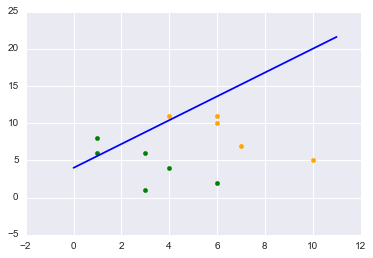

In [16]:
plot_result(W)

# B)

Since we are using the a linear activation function, the delta-rule is simply
$$ \delta = \frac{\partial E}{\partial net} = o^{(1)} − z $$
and the weghts are updated by
$$ \Delta w_{i} = − \eta \, o_i \, \delta, \qquad i=0,\dots,2 \quad $$

# C) and D)

In [17]:
def sigmoid(x):
    return 2*1/(1+np.exp(-x)) - 1

def step(x):
    return np.where( x > 0, 1, -1 )

def linear (x):
    return x

# Pass the activation Function
# Options: linear, step, sigmoid
activate = linear

def err(w, x, z):
    net = activate( np.dot(x,w) )
    return z - net

def plot_errors(errors):
    plt.plot(range(0,len(errors)), errors, label='Error' )   
    plt.legend()

New weights after 1 iteration:
 W0 = 1.9522
 W1 = 0.4396
 W2 = -0.7511


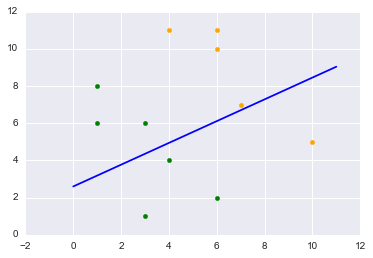

In [18]:
ETA = 1/50
W2  = W
M   = 1

for i in range(0,M):
    update_avg  = 0
    
    for x,z in zip(X,Z):
        e = err(W2,x,z)
        update_avg  += ETA * e * x / N
        
    W2 += update_avg

print('New weights after 1 iteration:\n W0 = {0:1.4f}\n W1 = {1:1.4f}\n W2 = {2:1.4f}'.format( *W2 ) )
plot_result(W2)

# E)

New weights:
 W0 = 2.0155
 W1 = -0.2141
 W2 = -0.1553


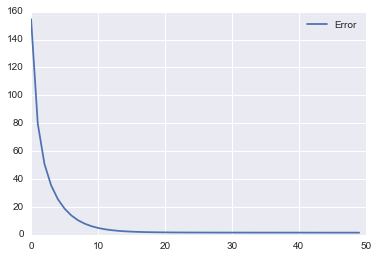

In [21]:
ETA = 1/50
W2  = W
M   = 50

errors = []

for i in range(0,M):
    total_error = 0
    update_avg  = 0
    
    for x,z in zip(X,Z):
        e = err(W2,x,z)
        total_error += e ** 2
        update_avg  += ETA * e * x / N
        
    W2 += update_avg      # Update the weights
    errors.append(total_error)
    if total_error == 0 : break

print('New weights:\n W0 = {0:1.4f}\n W1 = {1:1.4f}\n W2 = {2:1.4f}'.format( *W2 ) )
plot_errors(errors)

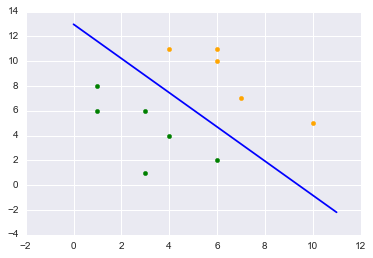

In [22]:
plot_result(W2)

# F)

Well, this seems like a good solution, at least for this training set.

Of course, we could not solve a non-linearly separable problem with this architecture.

<br/><br/><br/><br/>